# Model Evaluation and Visualization

In [23]:

import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
from model import UNet

In [24]:

def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ])
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    return transform(image).unsqueeze(0)  # Add batch dimension

# Example usage
image_path = r"/teamspace/studios/this_studio/u_net_implementation/data/test/test/0a0e3fb8f782_02.jpg"
input_image = preprocess_image(image_path)


In [25]:

def load_model(model_path):
    model = UNet()  
    checkpoint = torch.load(model_path)
    model.load_state_dict(checkpoint['state_dict'])  
    model.eval()  
    return model

model_path = r"/teamspace/studios/this_studio/u_net_implementation/checkpoints/unet_checkpoint.pth"
model = load_model(model_path)


In [26]:

def make_prediction(model, input_tensor):
    with torch.no_grad():
        output = model(input_tensor)
        return output

prediction = make_prediction(model, input_image)
prediction_for_binary = prediction


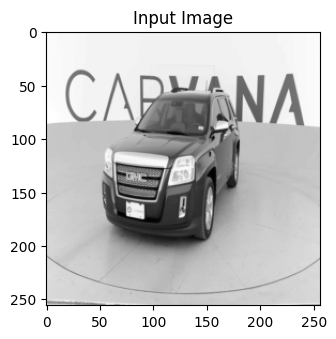

In [27]:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(input_image.squeeze(), cmap='gray')

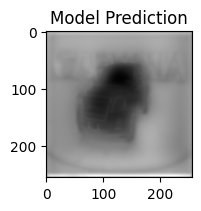

In [28]:
    prediction = prediction.squeeze()  # Remove batch dimension and convert to NumPy array
    #prediction = (prediction - prediction.min()) / (prediction.max() - prediction.min())
    if isinstance(prediction, torch.Tensor):
        prediction = prediction.cpu().detach().numpy()
    plt.subplot(1, 3, 3)
    plt.title("Model Prediction")
    plt.imshow(prediction[0], cmap='gray')

    plt.show()

In [29]:
prediction_for_binary = prediction_for_binary.squeeze()

threshold = 1
binary_prediction = (prediction_for_binary > threshold) # Convert to binary


(-0.5, 255.5, 255.5, -0.5)

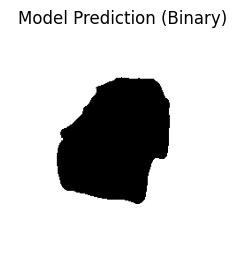

In [30]:
   plt.subplot(1, 2, 2)
   plt.title("Model Prediction (Binary)")
   plt.imshow(binary_prediction[0], cmap='gray', vmin=0, vmax=1)  # Display as binary
   plt.axis('off')

In [31]:
def visualize_predictions()

IndentationError: unexpected indent (1898386872.py, line 11)